# ReLU와 그 변형들 (ReLU and its Variants)

### 개념 요약
ReLU(Rectified Linear Unit)는 현대 딥러닝에서 가장 표준적으로 사용되는 활성화 함수(activation function)임. 계산이 빠르고 학습 효율이 높다는 장점이 있지만, 특정 조건에서 뉴런이 비활성화되는 '죽은 ReLU(Dying ReLU)' 문제가 발생할 수 있음.

이러한 단점을 보완하기 위해, 음수 입력값에 대한 동작 방식을 수정한 Leaky ReLU, PReLU, ELU, SELU 등 다양한 변형 함수들이 제안되었음. 이 노트북에서는 ReLU와 주요 변형 함수들의 개념과 특징을 비교하고 시각화함.

### 📘 함수별 개념 및 수학적 배경

#### 1. ReLU (Rectified Linear Unit)
- **개념**: 입력이 0보다 크면 값을 그대로 출력하고, 0보다 작거나 같으면 0을 출력.
- **수식**: $$f(x) = \max(0, x)$$
- **장점**: 연산이 매우 빠르고, 양수 영역에서 기울기 소실 문제가 없음.
- **단점**: **죽은 ReLU** 😵. 입력이 음수가 되면 기울기가 0이 되어 해당 뉴런의 학습이 멈출 수 있음.

--- 

#### 2. Leaky ReLU
- **개념**: '죽은 ReLU' 문제를 해결하기 위해, 음수 입력에 대해서도 0이 아닌 아주 작은 기울기($\alpha=0.01$)를 적용.
- **수식**: $$f(x) = \max(0.01 x, x)$$ (단, $\alpha$는 0.01과 같이 미리 정해진 작은 상수)
- **장점**: 모든 영역에서 기울기가 0이 되지 않아 뉴런이 죽는 현상을 방지함.

--- 

#### 3. PReLU (Parametric ReLU)
- **개념**: Leaky ReLU와 유사하지만, 음수 영역의 기울기($\alpha$)를 하이퍼파라미터가 아닌, 학습을 통해 결정되는 파라미터로 취급.
- **수식**: $$f(x) = \max(\alpha x, x)$$ (단, $\alpha$는 학습되는 파라미터)
- **장점**: 데이터에 가장 적합한 활성화 형태를 모델이 스스로 학습함.

--- 

#### 4. ELU (Exponential Linear Unit)
- **개념**: 음수 영역에서 지수 함수를 사용하여 부드러운 곡선 형태로 값을 출력. 뉴런의 평균 출력을 0에 가깝게 만들어 학습을 안정시킴.
- **수식**: $$f(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha(e^x - 1) & \text{if } x \le 0 \end{cases}$$ (단, $\alpha$는 양수인 하이퍼파라미터, 보통 1로 설정)
- **장점**: 죽은 ReLU 문제를 해결하며, 출력값이 부드러워 노이즈에 강건할 수 있음.
- **단점**: 지수 함수 계산으로 ReLU보다 연산 비용이 높음.

--- 

#### 5. SELU (Scaled Exponential Linear Unit)
- **개념**: **자기 정규화(self-normalizing)** 기능을 갖는 ELU의 확장판. 특정 조건 하에 각 층의 출력이 자동으로 평균 0, 표준편차 1로 정규화됨.
- **수식**: $$f(x) = \lambda \begin{cases} x & \text{if } x > 0 \\ \alpha(e^x - 1) & \text{if } x \le 0 \end{cases}$$
    - $\lambda$와 $\alpha$는 특정 상수(약 1.0507, 1.6732)로 고정됨.
- **장점**: 배치 정규화(Batch Normalization) 없이도 학습을 안정시킬 수 있음.
- **단점**: 특정 조건(Lecun 초기화, 순전파 신경망)에서만 효과가 보장됨.

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

### 핵심 로직 구현 (Code Implementation)
각 활성화 함수를 Python 코드로 정의함. PReLU는 Leaky ReLU와 함수 형태가 같으므로 별도로 구현하지 않고 개념적 차이로 설명함.

In [2]:
# 시각화를 위한 입력 데이터 준비
x_data = np.linspace(-3, 3, 200)

# ReLU 함수
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU 함수 (PReLU와 함수 형태 동일)
def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)

# ELU 함수
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# SELU 함수
def selu(x):
    lambda_val = 1.0507
    alpha_val = 1.6732
    return lambda_val * np.where(x > 0, x, alpha_val * (np.exp(x) - 1))

# 각 함수 적용
y_relu = relu(x_data)
y_leaky_relu = leaky_relu(x_data)
y_elu = elu(x_data)
y_selu = selu(x_data)

print("데이터 및 함수 준비 완료")

데이터 및 함수 준비 완료


### 📊 결과 확인 및 시각화 (Results & Visualization)
정의된 함수들을 하나의 그래프에 그려 형태를 직관적으로 비교함. 음수 입력 구간에서 각 함수의 동작 방식 차이를 명확히 확인할 수 있음.

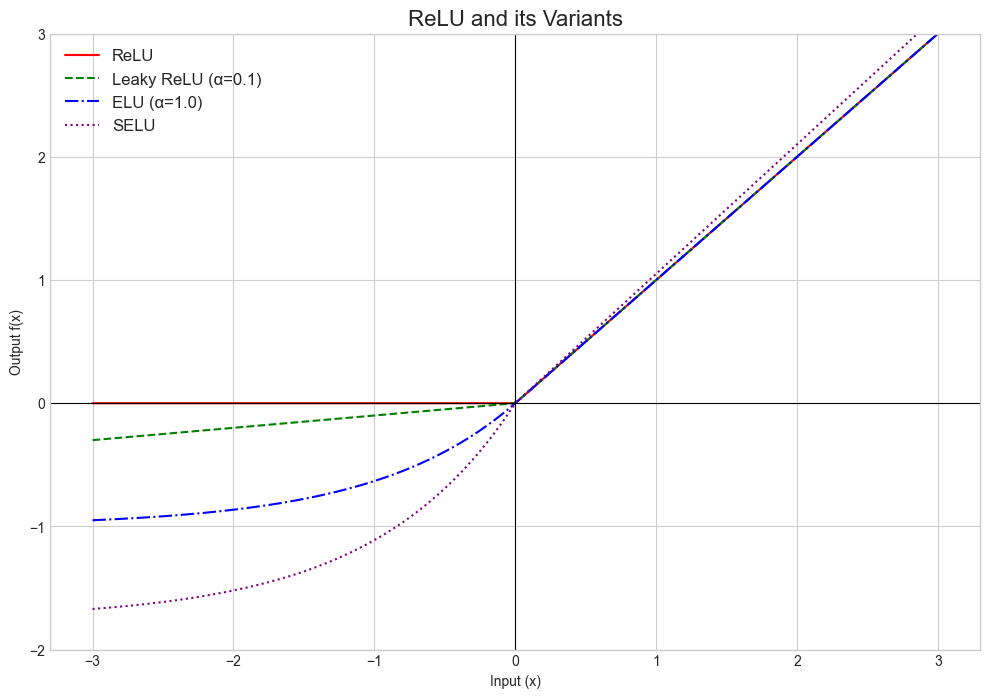

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

plt.plot(x_data, y_relu, label='ReLU', color='red', linestyle='-')
plt.plot(x_data, y_leaky_relu, label='Leaky ReLU (α=0.1)', color='green', linestyle='--')
plt.plot(x_data, y_elu, label='ELU (α=1.0)', color='blue', linestyle='-.')
plt.plot(x_data, y_selu, label='SELU', color='purple', linestyle=':')

plt.title('ReLU and its Variants', fontsize=16)
plt.xlabel('Input (x)')
plt.ylabel('Output f(x)')
plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
plt.ylim(-2, 3) # y축 범위 조절
plt.legend(fontsize=12)
plt.show()

### 최종 요약 (Conclusion)
| 함수 (Function) | 음수 입력 처리 | 기울기 소실 | 연산 비용 | 주요 특징 |
|---|---|---|---|---|
| **ReLU** | $0$ | 양수에서 없음 | 매우 낮음 | 가장 기본적이고 빠름, **죽은 ReLU** 문제 |
| **Leaky ReLU** | 작은 기울기($\alpha x$) | 없음 | 낮음 | 죽은 ReLU 문제 해결 |
| **PReLU** | 학습된 기울기($\alpha x$) | 없음 | 낮음 | 데이터에 최적화된 기울기 학습 |
| **ELU** | 지수 함수 곡선 | 없음 | 높음 | 출력 평균이 0에 가까워짐, 노이즈에 강건 |
| **SELU** | 스케일된 지수 함수 | 없음 | 높음 | **자기 정규화**(Self-Normalizing) 기능 |

**결론적으로**, 특별한 이유가 없다면 **ReLU**가 가장 좋은 출발점임. 만약 '죽은 ReLU'가 문제된다면 **Leaky ReLU**나 **ELU**를 시도해볼 수 있으며, 매우 깊은 순전파 신경망에서는 **SELU**가 좋은 대안이 될 수 있음.